In [ ]:
# Implement the image enhancement techniques.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = r'C:\Users\DELL\Downloads\Dogphoto.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Negative Transformation
def negative_transformation(img):
    return 255 - img

# Logarithmic Transformation

# Power-law (Gamma) Transformation

# Histogram Equalization
def histogram_equalization(img):
    return cv2.equalizeHist(img)

# Plot histogram function
def plot_histogram(img, title):
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Applying the transformations
negative_img = negative_transformation(img)
equalized_img = histogram_equalization(img)

# Plotting the images and histograms

# First figure: Original, Negative, Logarithmic Images and their Histograms
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plot_histogram(img, 'Original Histogram')

plt.subplot(3, 2, 3)
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plot_histogram(negative_img, 'Negative Histogram')

plt.tight_layout()
plt.show()

# Second figure: Gamma Transformation and Histogram Equalization
plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plot_histogram(equalized_img, 'Equalized Histogram')

plt.tight_layout()
plt.show()

# Third figure: Histograms before and after Equalization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_histogram(img, 'Histogram Before Equalization')

plt.subplot(1, 2, 2)
plot_histogram(equalized_img, 'Histogram After Equalization')

plt.tight_layout()
plt.show()

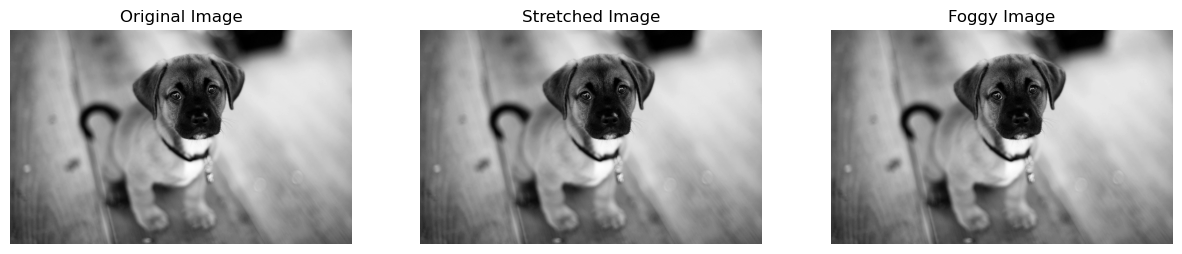

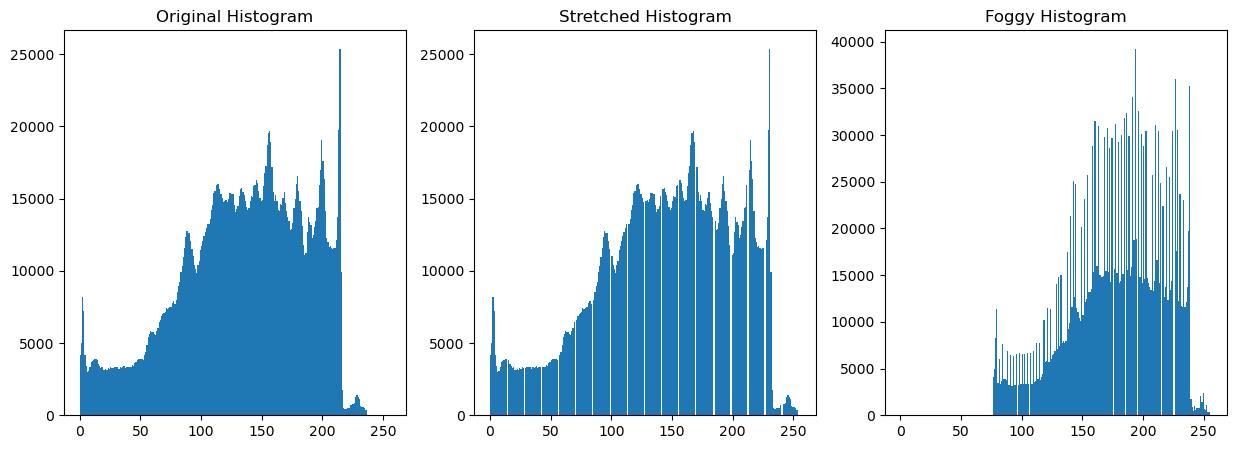

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the grayscale image of the dog
image_path = r'C:\Users\DELL\Downloads\Dogphoto.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The file at path {image_path} does not exist.")

# Load the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    raise ValueError(f"Failed to load the image from path {image_path}")

# Linear Contrast Stretching
def linear_stretching(img):
    # Find the minimum and maximum pixel values in the image
    min_val = np.min(img)
    max_val = np.max(img)

    # Apply the linear transformation formula
    stretched_img = (img - min_val) * (255 / (max_val - min_val))

    # Convert to uint8 type
    stretched_img = np.clip(stretched_img, 0, 255).astype(np.uint8)
    return stretched_img

# Foggy Effect
def foggy_effect(img, intensity=0.5):
    # Create a foggy effect by blending the image with a white image
    fog = np.ones(img.shape, dtype=np.uint8) * 255  # White image
    foggy_img = cv2.addWeighted(img, 1 - intensity, fog, intensity, 0)
    return foggy_img

# Apply linear stretching to the image
stretched_img = linear_stretching(img)

# Apply foggy effect to the stretched image
foggy_img = foggy_effect(stretched_img, intensity=0.3)  # Adjust intensity for more/less fog

# Plotting the original, stretched, and foggy images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(foggy_img, cmap='gray')
plt.title('Foggy Image')
plt.axis('off')

plt.show()

# Plotting the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')

plt.subplot(1, 3, 2)
plt.hist(stretched_img.ravel(), 256, [0, 256])
plt.title('Stretched Histogram')

plt.subplot(1, 3, 3)
plt.hist(foggy_img.ravel(), 256, [0, 256])
plt.title('Foggy Histogram')

plt.show()